# Telecommunication_user_churn_classifier

## 1. Data Mining


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
print("Libraries imported successfully.....")

Libraries imported successfully.....


In [2]:
#Importing data
df = pd.read_csv("telecom_customer_churn.csv")

print("Data imported successfully.....")

Data imported successfully.....


## 2. Data Cleaning and EDA

In [3]:
#Separate numerical and categorical columns

from preprolib import myfunctions
num_cols = []
cat_cols = []

ignore_list = ['Zip Code', 'Longitude', 'Latitude', 
                'Customer ID', 'Churn Category', 
                'Churn Reason', 'Customer Status', 'City']

myfunctions.cat_or_num(df, ignore_list, num_cols, cat_cols)

label = 'Customer Status'


## 2.1 Exploratory Data Analysis


### 2.1.1 Numerical data


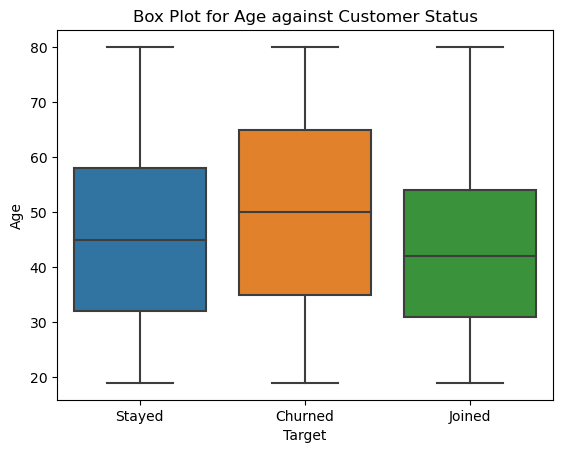

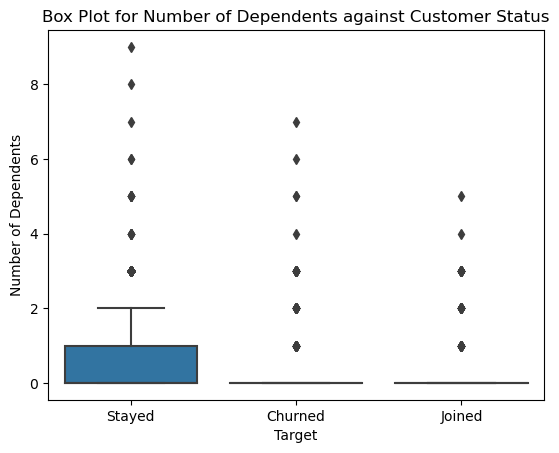

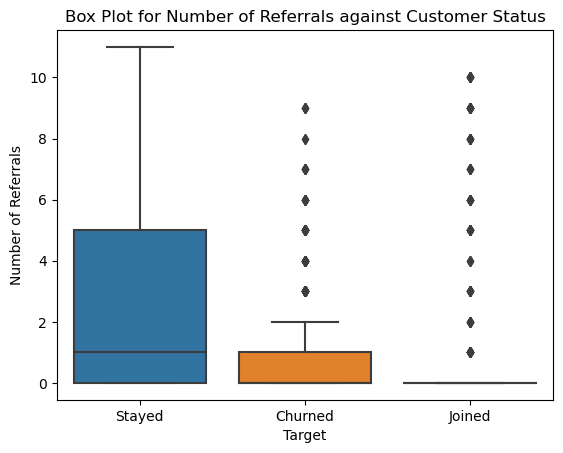

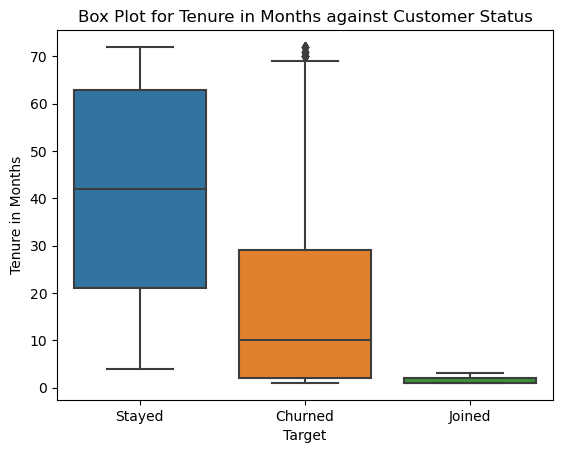

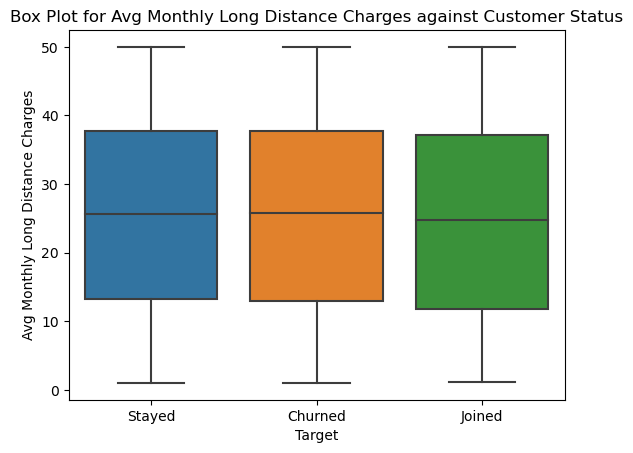

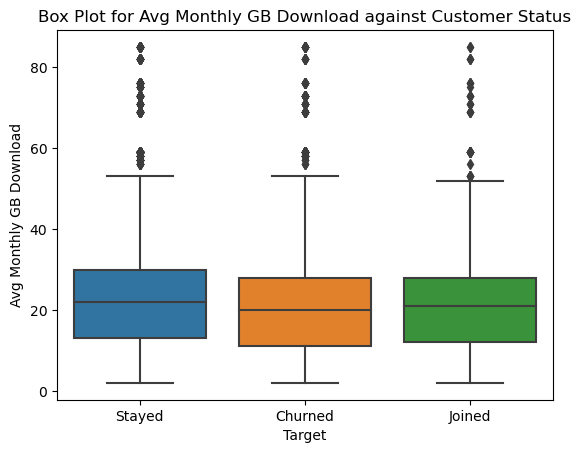

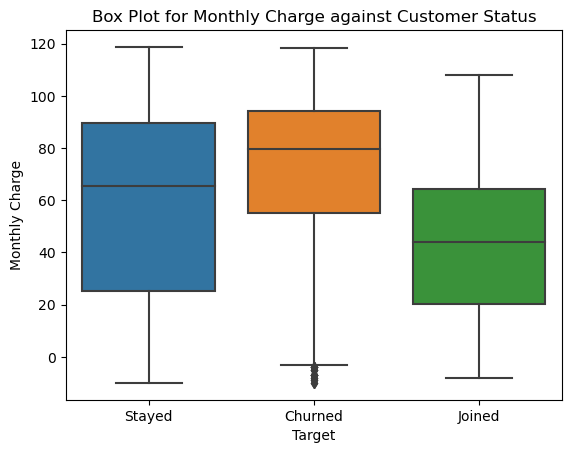

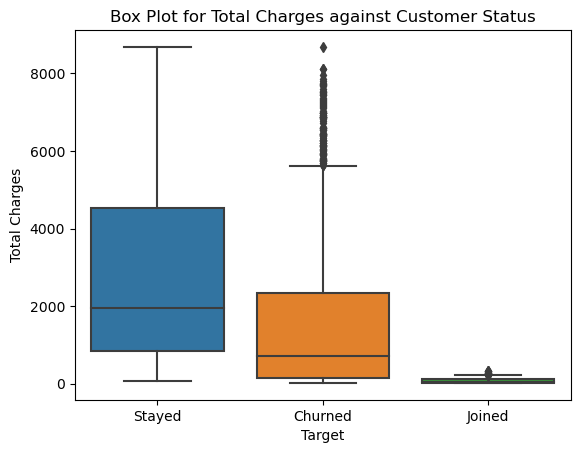

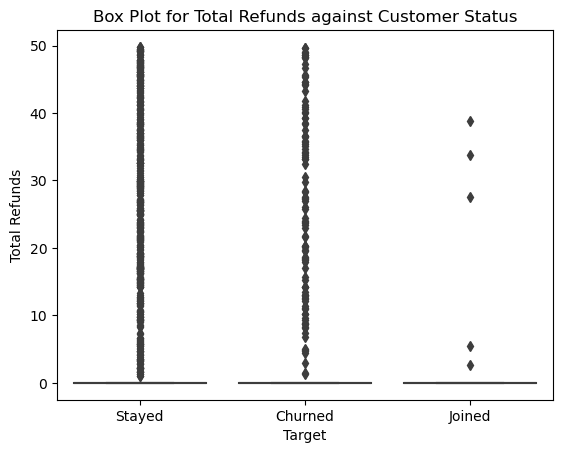

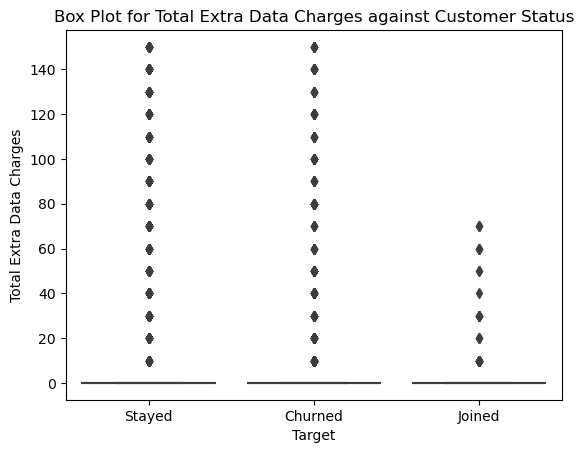

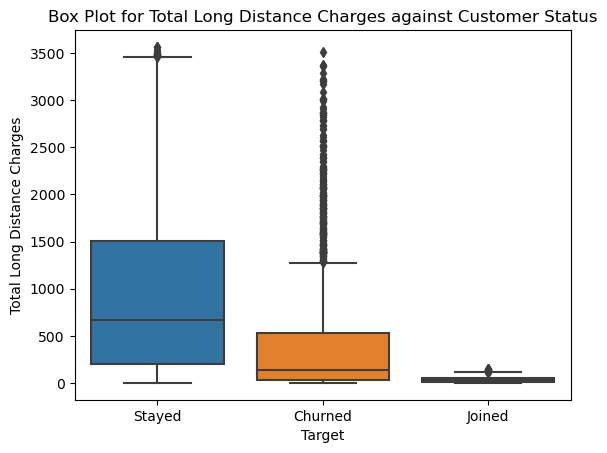

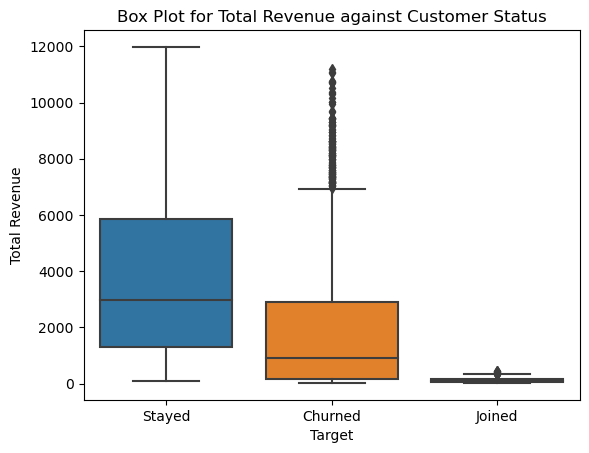

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

In [4]:
# Box plots for numerical data
for column in num_cols:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(x='Customer Status', y=column, data=df)
    plt.title(f'Box Plot for {column} against {"Customer Status"}')
    plt.ylabel(column)
    plt.xlabel('Target')
    plt.show()

num_cols

#### Inferences
##### Age
Most users from age 30 to 60 stayed, 35 to 65 churned and 30 to 50 just joined. For the most part, age is too close to call as a factor for churn.

##### Number of Dependents
The relationship between number of dependents and Customer status is linear as the more dependents there are the less likely to churn the user is. *To confirm after scaling.*

##### Number of Referrals
A relationship between number of referances and Customer status is also linear as the more a user refers other customers, the higher the likelyhood they stay. *To confirm this fact after scaling*

##### Tenure in Months
The relationship between Tenure in Months and Customer status is also linear as the longer the customer tenure the more likely they stay. *To confirm after smoothing and scaling*


##### Avg Monthly Long distance Charges
The facts provided by the graph is inconclusive. The uniformity of it is quite compelling but the graphs for avg monthly long distance charges against each respective status are identical. Might lead to overfitting.

##### Avg Monthly GB Download
Same as above. Plus tons of outliers.

##### Monthly Charge
The lower the monthly charge the more likely the user is to stay. Hence we must take our attention to the data plans columns to check which influences churn the most and also their details. (Should check if we are to discard this.)

##### Total Charges.
I am puzzled here. Monthly charge is a customers total charge per month and total charge calculated at the end of each quarter. Here, ths lower the charge the more chances of churn. *Further investigation to be done on the relationship and of course, smoothing*

##### Total Refunds
Interesting graph. Should smooth to get a better read.

##### Total Extra Data Charges
Interesting graph. Should smooth to get a better read.

##### Total Long Distance Charges
The higher the number of long distance charges the more likely they are to stay. Speaks to quality of long distance service.

##### Total Revenue 
The higher the revenue from a user the more likely they are to stay. Speaks to loyalty. 

### 2.1.2 Categorical data

  



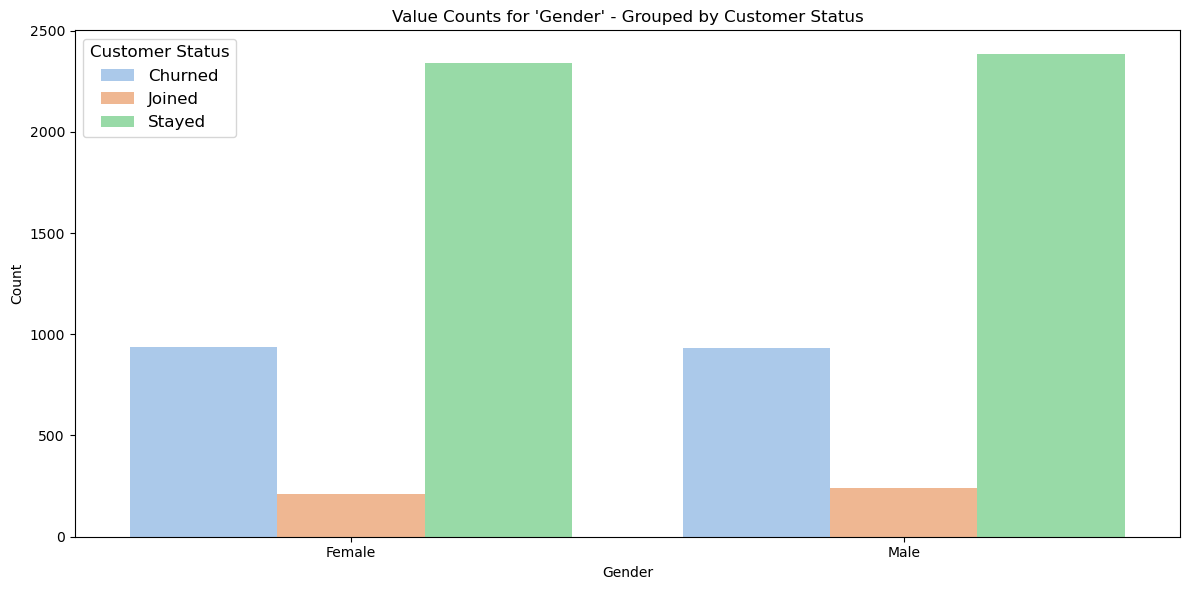

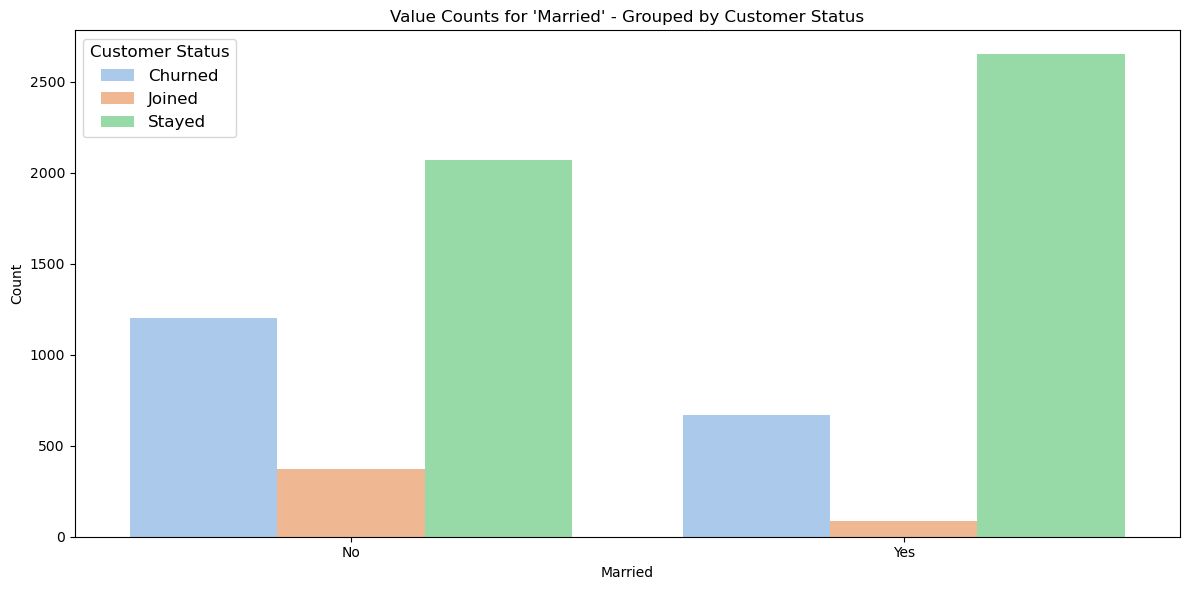

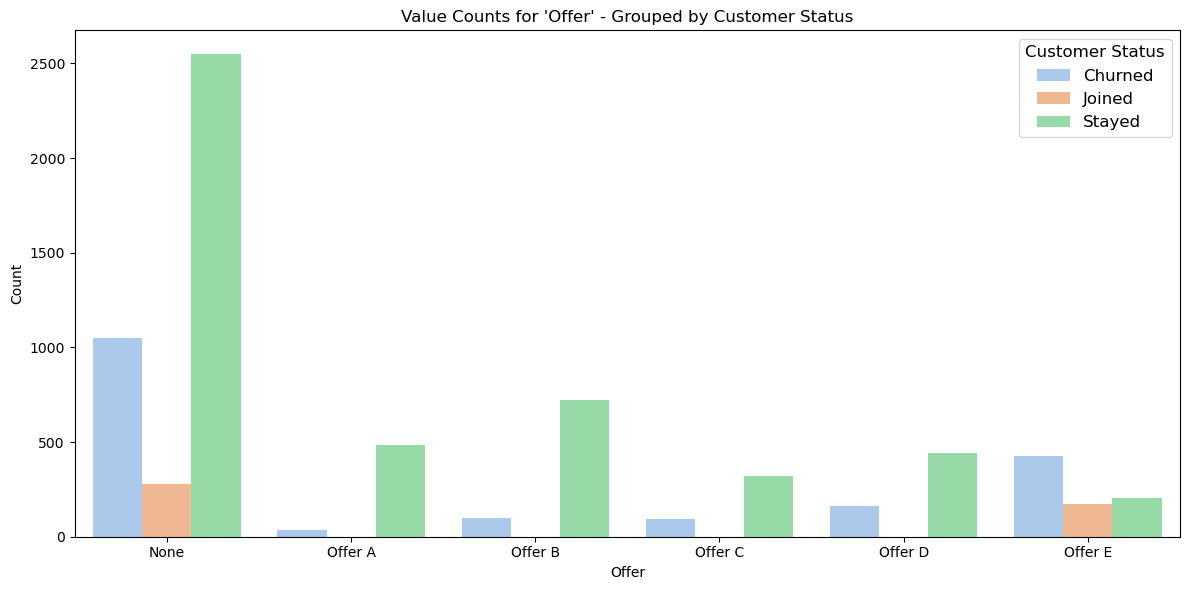

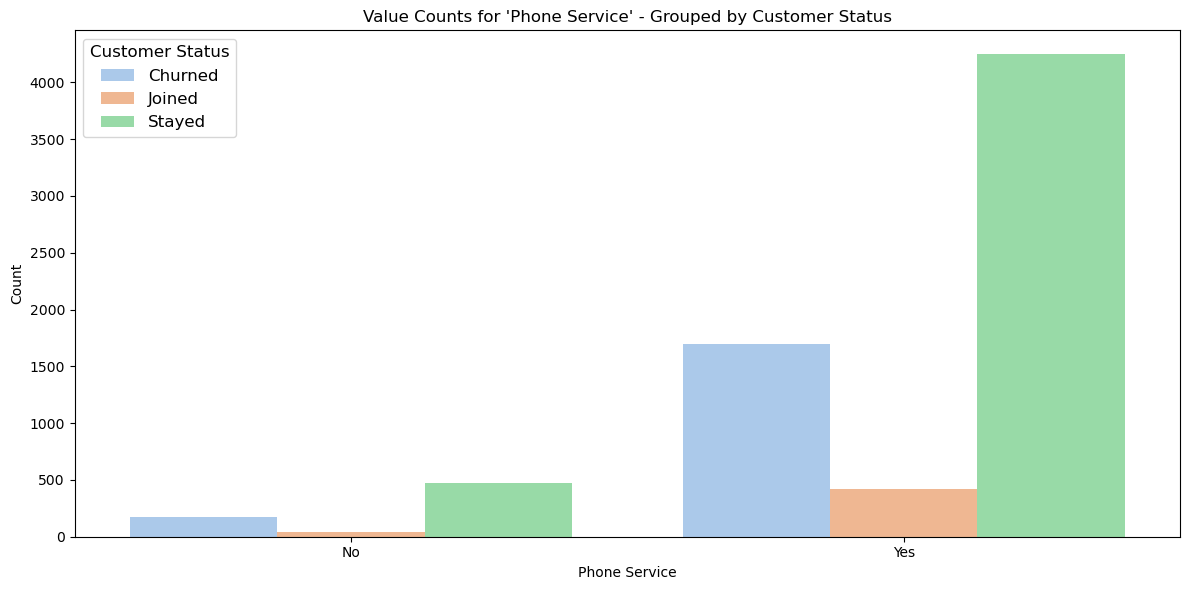

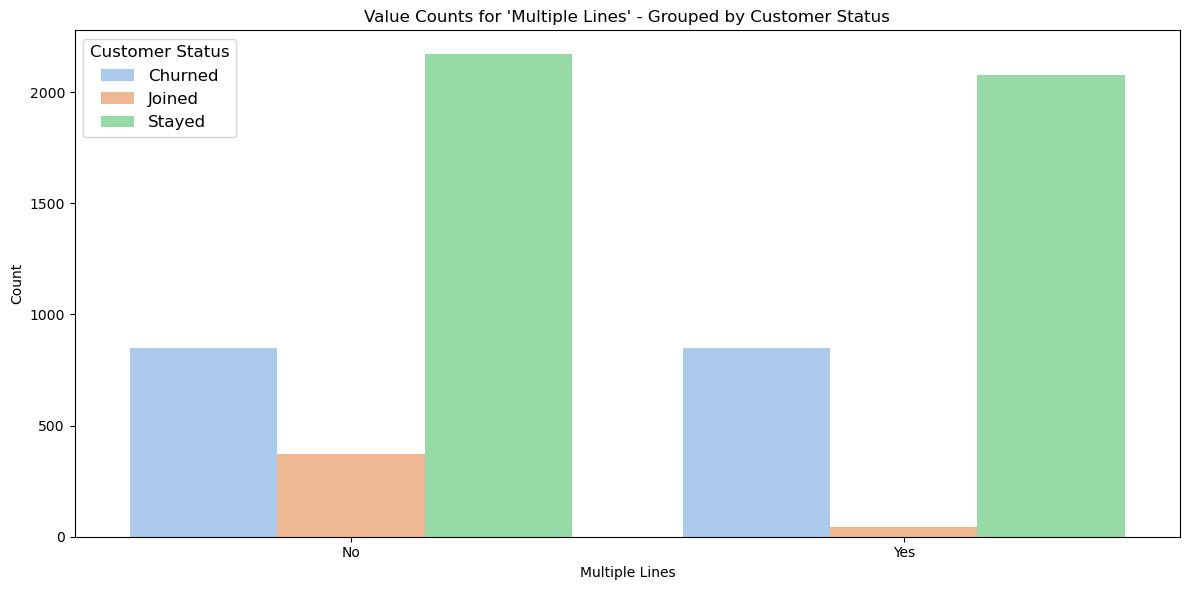

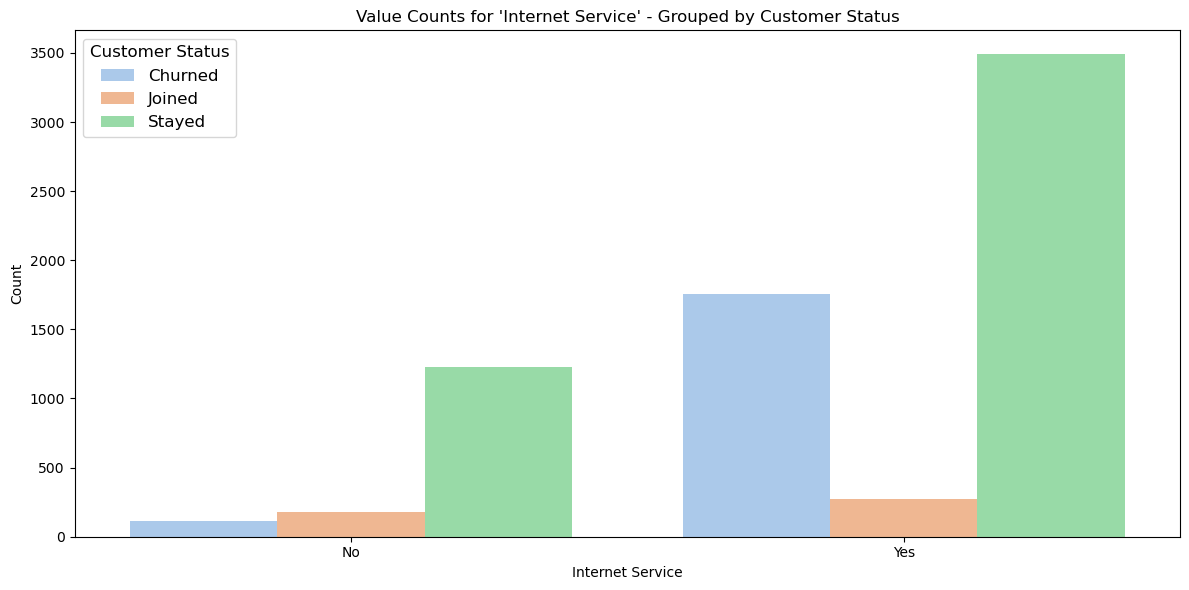

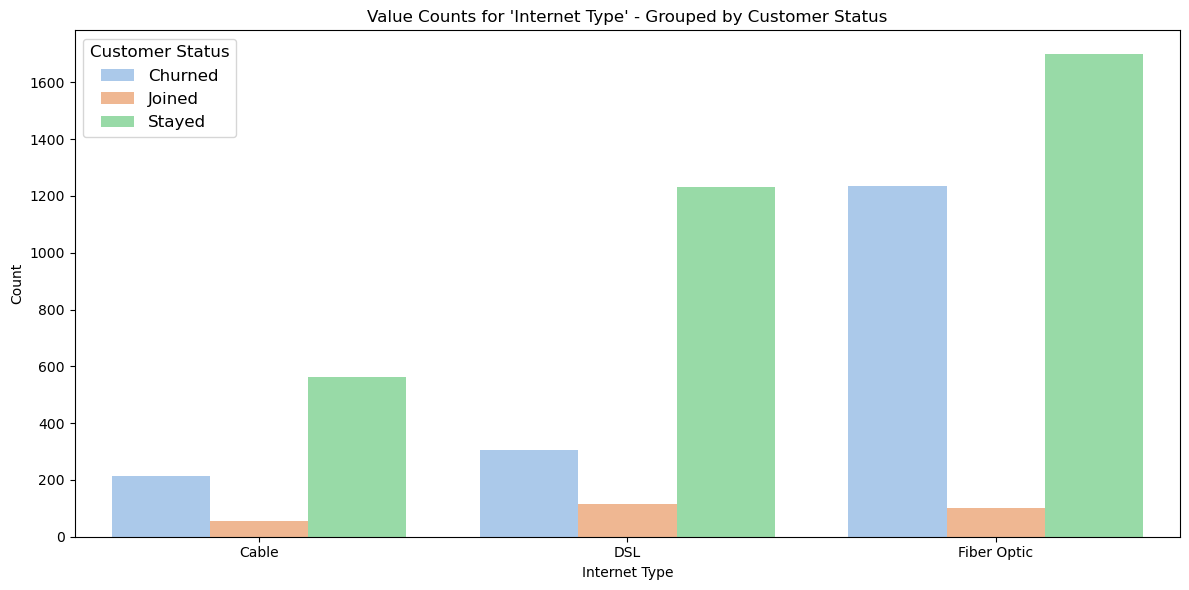

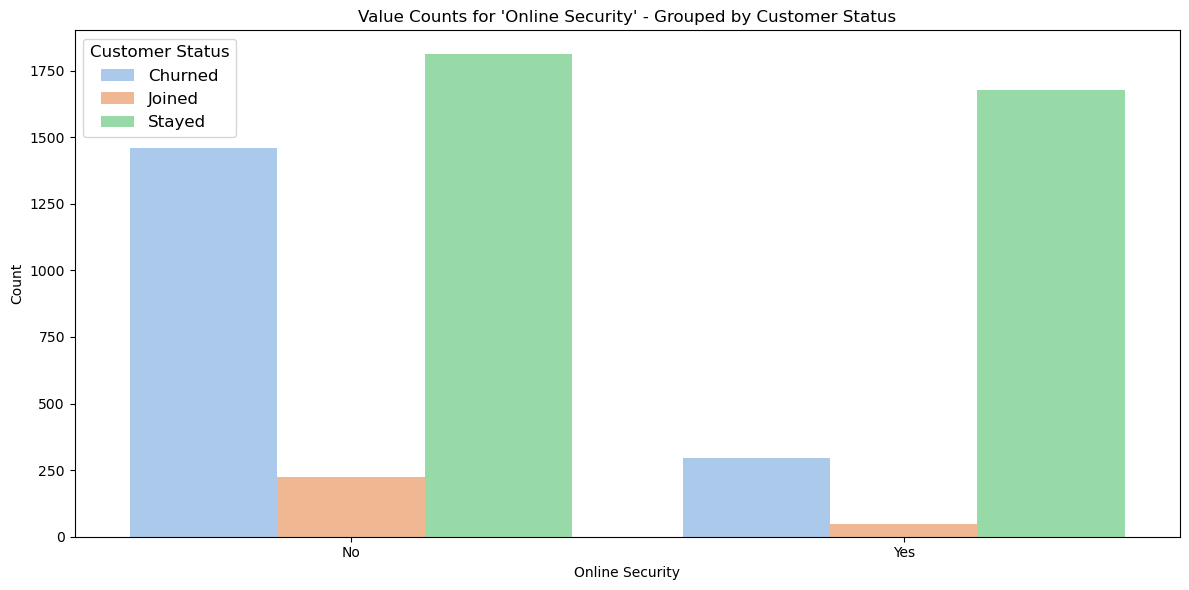

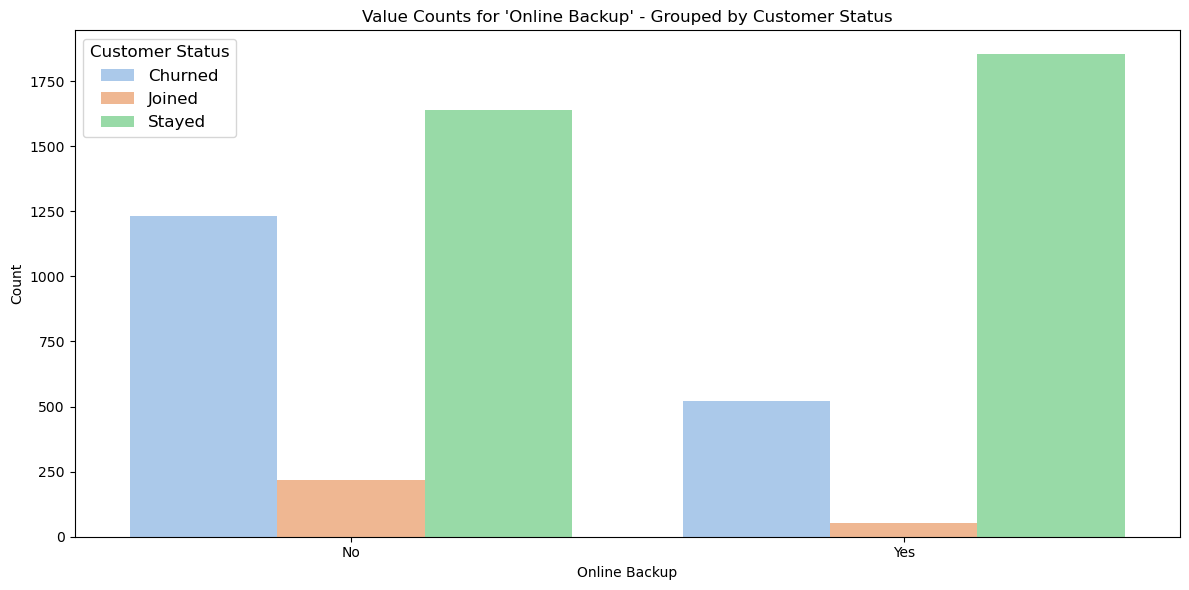

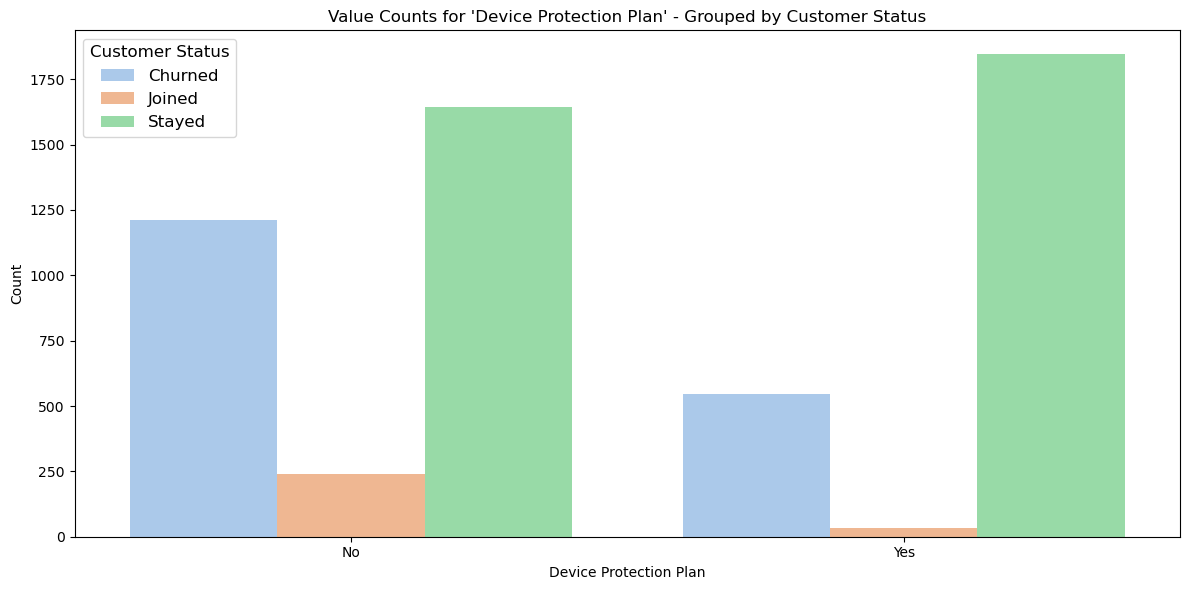

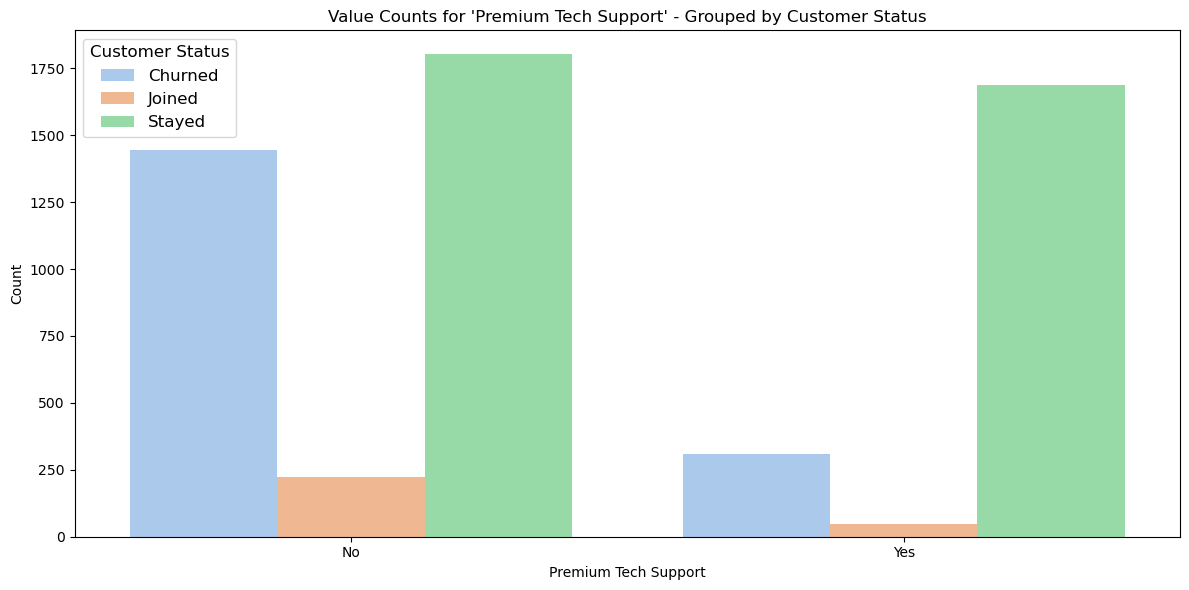

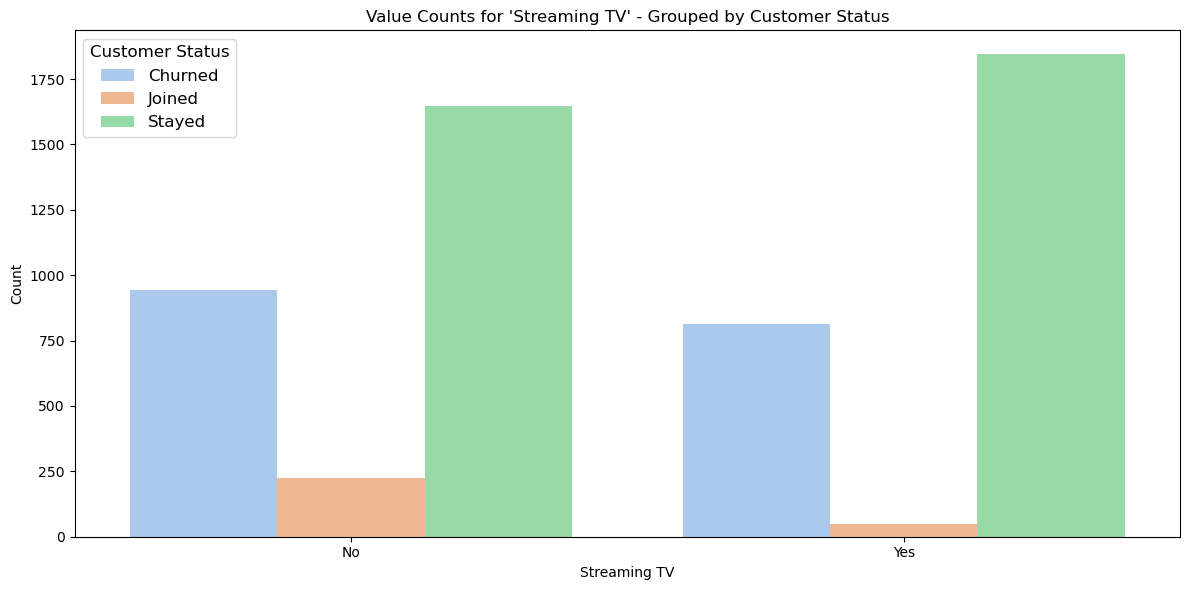

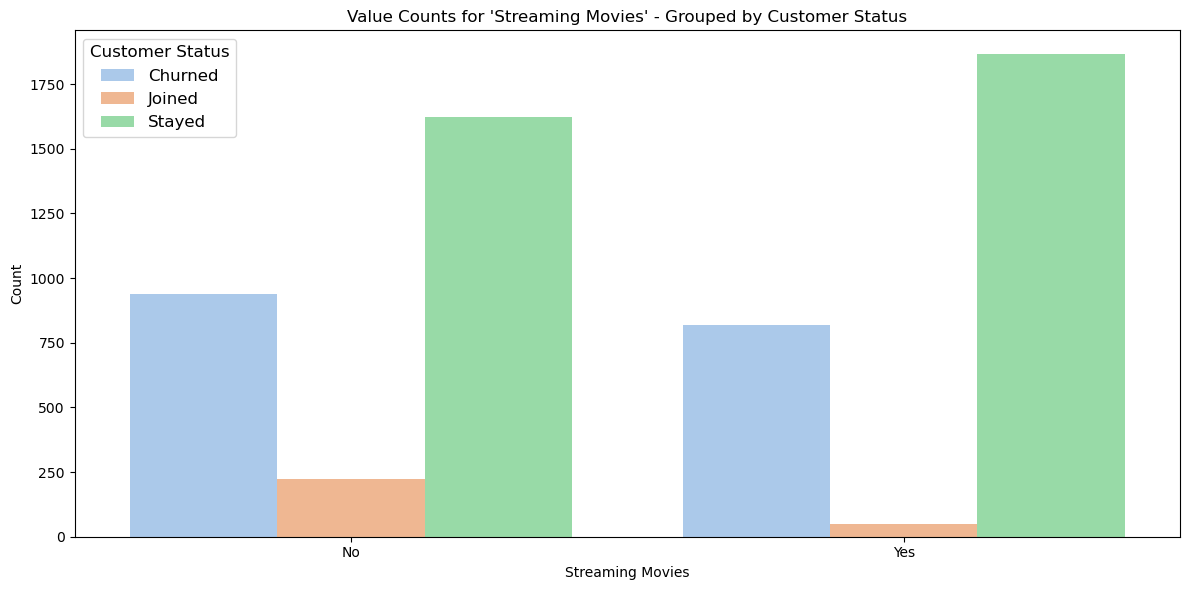

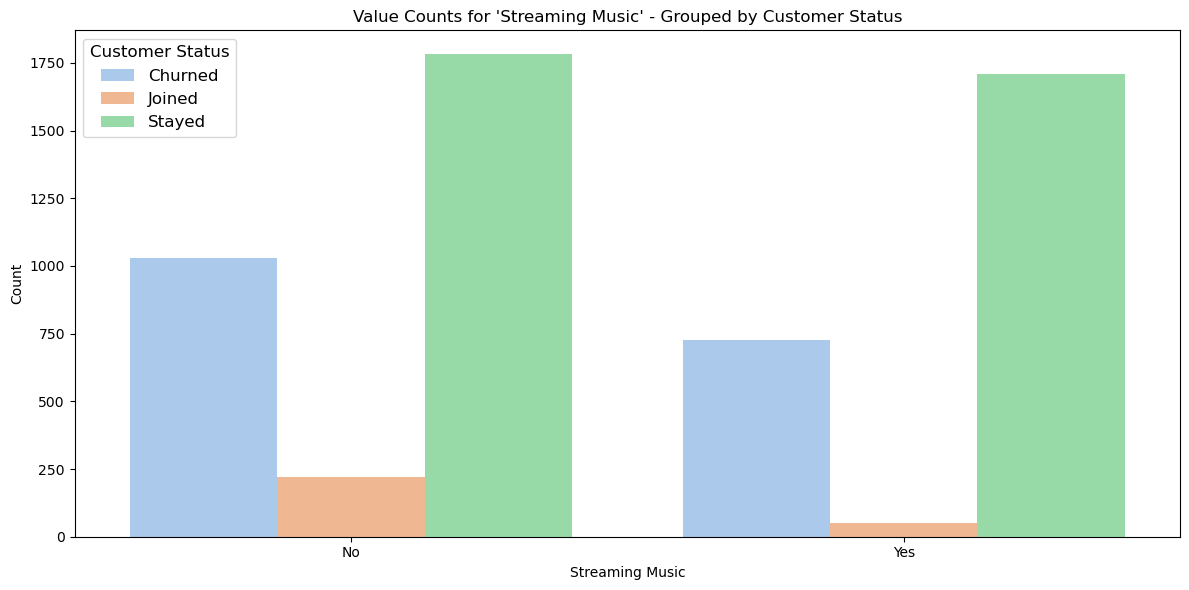

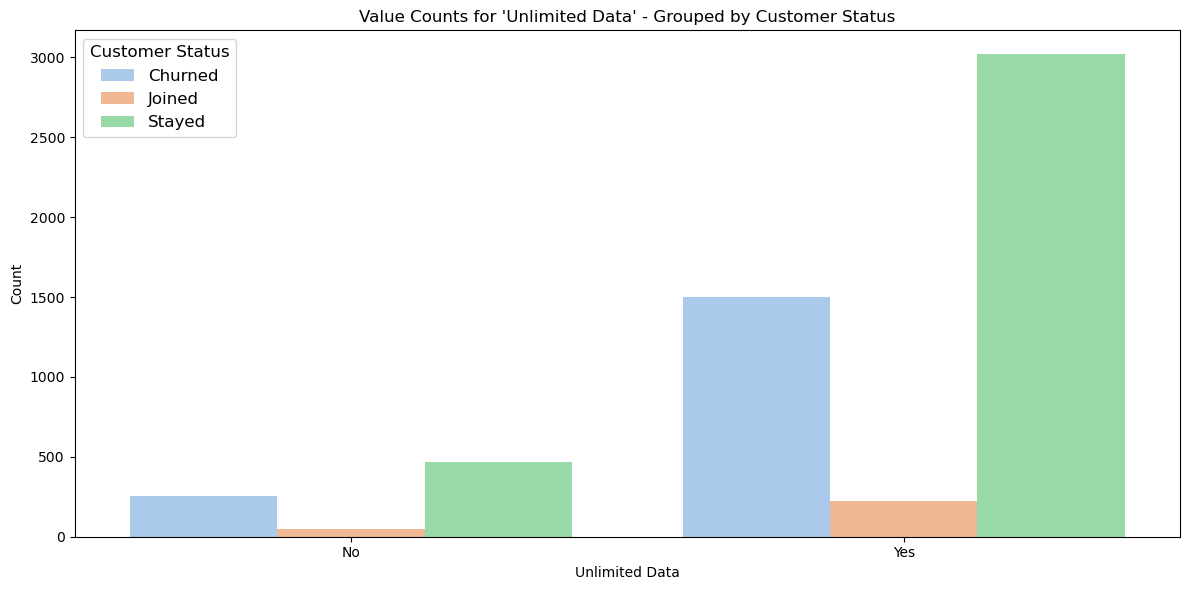

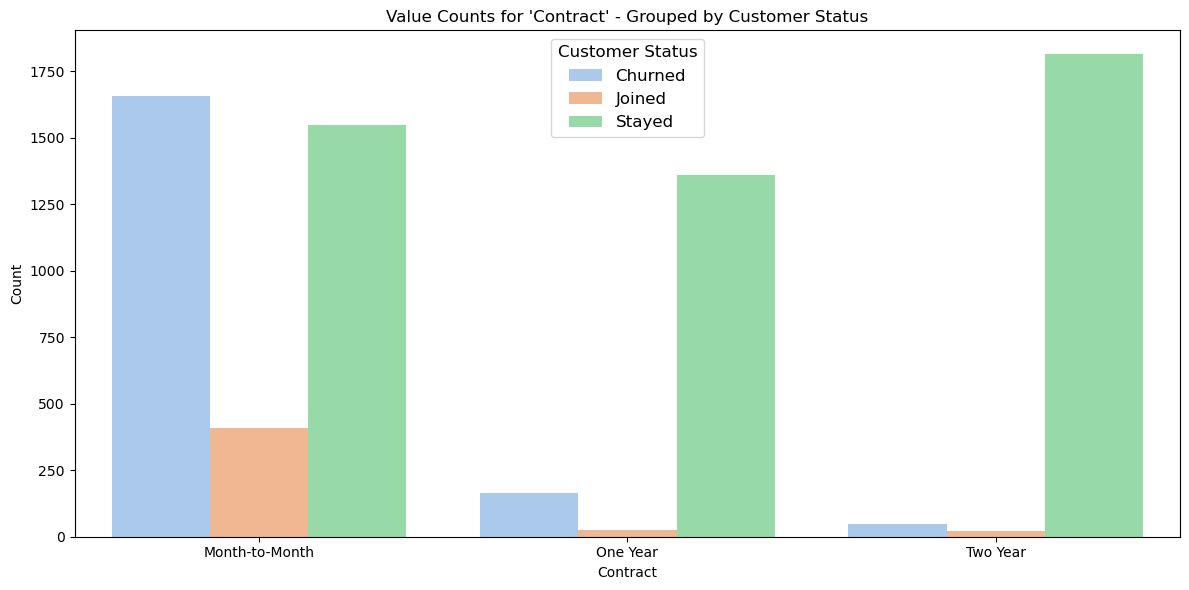

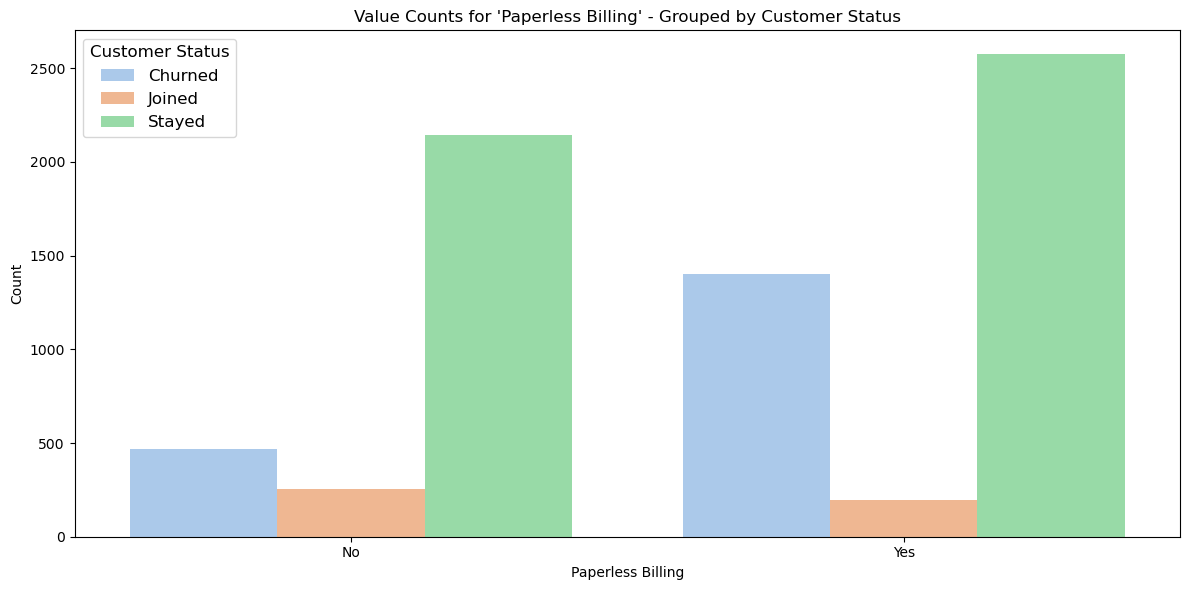

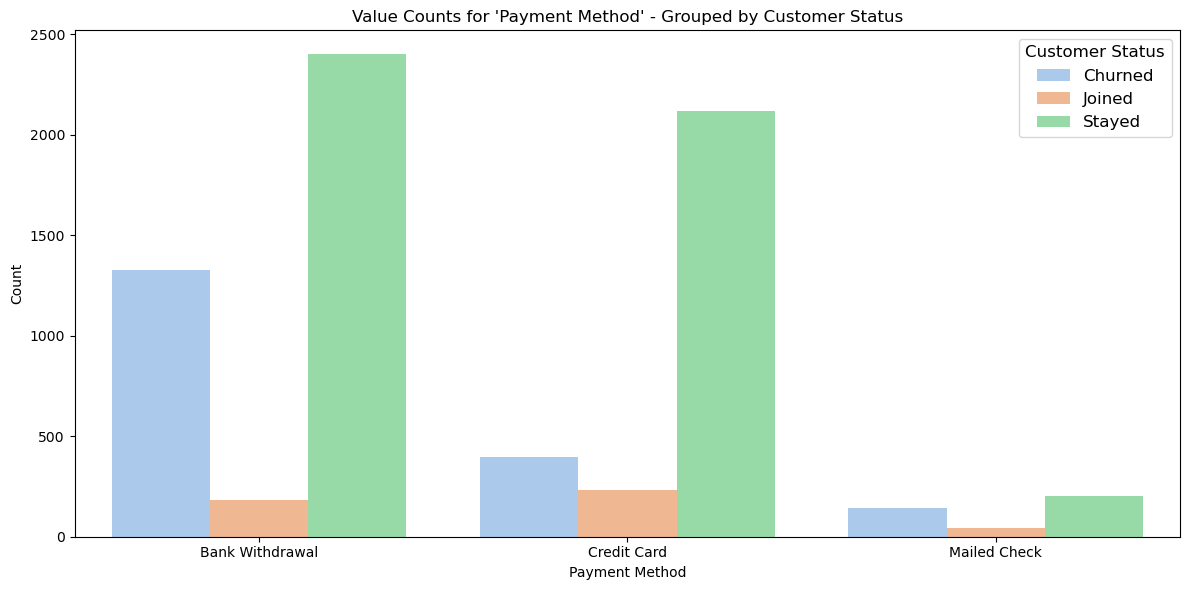

In [5]:
# Group by 'Customer Status' and each categorical column, and get value counts for each category
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    plt.title(f"Value Counts for '{col}' - Grouped by Customer Status")

    # Group the data by 'Customer Status' and the current column, and get value counts for each category
    group_counts = df.groupby(['Customer Status', col]).size().unstack()

    # Plot the grouped bar chart
    sns.barplot(data=group_counts.reset_index().melt(id_vars='Customer Status', value_name='Count'),
                x=col, y='Count', hue='Customer Status', palette='pastel')

    # Set labels and legend
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Customer Status', title_fontsize='large', fontsize='large')

    plt.tight_layout()
    plt.show()

#### Inferences

##### 'Gender',

Identical graphs. This column is inqonsequential

  

##### 'Married',

Identical graphs. This column is inqonsequential

  

##### 'Offer',

A large percentage of users in offer E leave. Followed by users subscrided to no offers. This column is to be coded ordinally based on percentage of churn per category

  

##### 'Phone Service',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

##### 'Multiple Lines',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Internet Service',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Internet Type',

Further investigation to be done on this column

  

##### 'Online Security',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Online Backup',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Device Protection Plan',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Premium Tech Support',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Streaming TV',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Streaming Movies',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Streaming Music',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Unlimited Data',

People who pay for this service are more likely to stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Contract',

The longer the contract the more likely the user will stay. This column is to be coded ordinally based on percentage of churn per category.

  

##### 'Paperless Billing',

Further investigation is required

  

##### 'Payment Method'

Users who pay via mail are less common and are more likely to churn. This column is to be coded ordinally based on percentage of churn per category.

### 2.2 Data preprocessing


In [6]:
##num_cols.remove

remove_num = ['Age', 'Avg Monthly Long Distance Charges',  'Avg Monthly GB Download', 'Monthly Charge']

num_cols = [x for x in num_cols if x not in remove_num]



In [7]:
##cat_cols.remove

remove_cat = ['Age', 'Avg Monthly Long Distance Charges',  'Avg Monthly GB Download', 'Monthly Charge']

cat_cols = [x for x in cat_cols if x not in remove_cat]

In [8]:
# Check for duplicate column names in the DataFrame
duplicates = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicates)

# Rename columns with duplicate names by adding a suffix to make them unique
df.columns = [col if col not in duplicates else f"{col}_{i}" for i, col in enumerate(df.columns)]

# Now proceed with the pipeline as before
# ... (rest of the code) ...


Duplicate columns: Index([], dtype='object')


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define the features and label
features = cat_cols + num_cols
label = 'Customer Status'

# Convert the label column to ordinal categories
label_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = label_encoder.fit_transform(df[label].values.reshape(-1, 1))

# Function to encode based on the percentage of churn per category
def custom_encode(column, churn_column):
    churn_percentage = df.groupby(column)[churn_column].mean()
    return churn_percentage.rank().fillna(0).astype(int)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.3, random_state=0)

# Define a pipeline for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define a pipeline for categorical columns
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Create a ColumnTransformer to apply the pipeline to the numeric and categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

# Fit the preprocessor to the training data and transform both the training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print('Training Set: %d, Test Set: %d \n' % (len(X_train), len(X_test)))

# Print the transformed DataFrames
print("X_train_Transformed:\n", X_train_transformed)
print("\nX_test_Transformed:\n", X_test_transformed)

Training Set: 4930, Test Set: 2113 

X_train_Transformed:
 [[ 2.67193796  1.36376374  0.71684667 ...  1.          1.
   0.        ]
 [ 2.67193796 -0.64021696 -0.38338118 ...  2.          0.
   1.        ]
 [-0.48470094  1.36376374  0.55384995 ...  2.          0.
   1.        ]
 ...
 [-0.48470094 -0.64021696  0.18710734 ...  1.          0.
   0.        ]
 [-0.48470094 -0.64021696 -1.27986312 ...  0.          0.
   0.        ]
 [ 0.56751203 -0.30622017  1.4503319  ...  2.          0.
   0.        ]]

X_test_Transformed:
 [[ 0.56751203  0.36177339  0.59459913 ...  0.          0.
   0.        ]
 [-0.48470094 -0.64021696 -1.27986312 ...  0.          1.
   0.        ]
 [-0.48470094 -0.64021696  0.47235159 ...  2.          0.
   1.        ]
 ...
 [-0.48470094  0.02777661  0.96134175 ...  1.          0.
   1.        ]
 [ 1.61972499 -0.64021696 -0.09813692 ...  1.          0.
   0.        ]
 [-0.48470094  1.36376374  1.61332862 ...  2.          1.
   0.        ]]


## 3. Model Selection

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier#
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score


from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

#mcm = confusion_matrix(y_test, predictions)
kn_model = KNeighborsClassifier().fit(X_train_transformed, y_train)
dt_model = DecisionTreeClassifier().fit(X_train_transformed, y_train.argmax(axis=1))  # Convert one-hot encoded y_train to 1D array
rf_model = RandomForestClassifier().fit(X_train_transformed, y_train.argmax(axis=1))  # Convert one-hot encoded y_train to 1D array
nb_model = GaussianNB().fit(X_train_transformed, y_train.argmax(axis=1))  # Convert one-hot encoded y_train to 1D array
ab_model = AdaBoostClassifier().fit(X_train_transformed, y_train.argmax(axis=1))  # Convert one-hot encoded y_train to 1D array



models = [
    #('Logistic Regression', lr_model),
    ('K-Nearest Neighbors', kn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('Gaussian Naive Bayes', nb_model),
    ('AdaBoost', ab_model)
]


In [15]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define lists to store model evaluation results
model_names = []
recall_scores = []
f1_scores = []
precision_scores = []
accuracy_scores = []
fold_numbers = []  # New list to store fold numbers

def evaluate_model(curr_model, model_name, X_test, y_test, fold_number):
    predictions = curr_model.predict(X_test)

    # Calculate the necessary metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Append model name and metric scores to the respective lists
    model_names.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    fold_numbers.append(fold_number)  # Add fold number for the current evaluation
# Convert the one-hot encoded y_train to a 1-dimensional array
y_train_1d = y_train.argmax(axis=1)

# Model Evaluation using KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_number = 1  # Initialize fold number counter

for model_name, model in models:
    for train_index, test_index in kf.split(X_train_transformed):
        X_train_fold, X_test_fold = X_train_transformed[train_index], X_train_transformed[test_index]
        y_train_fold, y_test_fold = y_train_1d[train_index], y_train_1d[test_index]  # Use the 1D array

        model.fit(X_train_fold, y_train_fold)
        evaluate_model(model, model_name, X_test_fold, y_test_fold, fold_number)
        fold_number += 1  # Increment fold number for the next evaluation

# Create a DataFrame to store the model evaluation results
model_evaluation_df = pd.DataFrame({
    'Fold': fold_numbers,
    'Model': model_names,
    'Recall': recall_scores,
    'F1-score': f1_scores,
    'Precision': precision_scores,
    'Accuracy': accuracy_scores
})

# Print the DataFrame with model evaluation results
# Sort the DataFrame by accuracy in descending order
model_evaluation_df.sort_values(by='Accuracy', ascending=False, inplace=True)
model_evaluation_df.sort_values(by='Model', ascending=False, inplace=True)
model_evaluation_df.reset_index(drop=True, inplace=True)

print("\nModel Evaluation:")
print(model_evaluation_df)


c:\Users\User\.conda\envs\NewEnv\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\User\.conda\envs\NewEnv\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept


Model Evaluation:
    Fold                 Model    Recall  F1-score  Precision  Accuracy
0     14         Random Forest  0.838742  0.833542   0.831948  0.838742
1     11         Random Forest  0.817444  0.812563   0.809792  0.817444
2     15         Random Forest  0.814402  0.806147   0.805608  0.814402
3     12         Random Forest  0.814402  0.807854   0.807328  0.814402
4     13         Random Forest  0.830629  0.826354   0.826454  0.830629
5      1   K-Nearest Neighbors  0.763692  0.764509   0.767490  0.763692
6      2   K-Nearest Neighbors  0.779919  0.777013   0.782339  0.779919
7      4   K-Nearest Neighbors  0.776876  0.778518   0.780428  0.776876
8      3   K-Nearest Neighbors  0.768763  0.763760   0.767745  0.768763
9      5   K-Nearest Neighbors  0.754564  0.757109   0.761236  0.754564
10    19  Gaussian Naive Bayes  0.702840  0.720588   0.763935  0.702840
11    18  Gaussian Naive Bayes  0.708925  0.724627   0.762478  0.708925
12    17  Gaussian Naive Bayes  0.713996  0.7

c:\Users\User\.conda\envs\NewEnv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Calculate the mean performance metrics for each model across all folds
mean_performance = model_evaluation_df.groupby('Model').mean()

# Calculate the standard deviation of performance metrics for each model across all folds
std_performance = model_evaluation_df.groupby('Model').std()

# Print the mean and standard deviation of performance metrics
print("\nMean Performance across Folds:")
print(mean_performance)
print("\nStandard Deviation of Performance across Folds:")
print(std_performance)



Mean Performance across Folds:
                      Fold    Recall  F1-score  Precision  Accuracy
Model                                                              
AdaBoost              23.0  0.756592  0.701384   0.683308  0.756592
Decision Tree          8.0  0.769777  0.770182   0.771081  0.769777
Gaussian Naive Bayes  18.0  0.706491  0.722719   0.762394  0.706491
K-Nearest Neighbors    3.0  0.768763  0.768182   0.771847  0.768763
Random Forest         13.0  0.823124  0.817292   0.816226  0.823124

Standard Deviation of Performance across Folds:
                          Fold    Recall  F1-score  Precision  Accuracy
Model                                                                  
AdaBoost              1.581139  0.016773  0.021953   0.025704  0.016773
Decision Tree         1.581139  0.017727  0.017092   0.016220  0.017727
Gaussian Naive Bayes  1.581139  0.008974  0.008984   0.008883  0.008974
K-Nearest Neighbors   1.581139  0.010218  0.009226   0.009112  0.010218
Random Fore